In [17]:
!pip install azure-cognitiveservices-search-imagesearch


You should consider upgrading via the 'C:\Users\GlenKings\Desktop\fastbook\venv39\Scripts\python.exe -m pip install --upgrade pip' command.


In [18]:
#!pip install azure-cognitiveservices-vision-customvision

In [19]:
#!pip install utils
#!pip install azure
#!pip3 install azure-cognitiveservices-vision-computervision

from fastai.vision.all import *
from fastai.metrics import error_rate
import os
#import cv2
import numpy as np
from utils import *

In [20]:
#installing stuff

In [21]:


bs = 32  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = r"C:\Users\GlenKings\Desktop\py\classes1"

In [22]:
#bs = 32  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
#sz = 224 #image size
#PATH = './classes/'

In [23]:
classes1 = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes1.append(d) 
print ("There are ", len(classes1), "classes:\n", classes1)

There are  2 classes:
 ['cree', 'lilimar']


In [24]:
fns = get_image_files(PATH)
fns

(#310) [Path('C:/Users/GlenKings/Desktop/py/classes1/cree/-cicchino-at-the-smurfs-the-lost-village-premiere-at-the-arclight-1264308364.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/0OKudRoG.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/1118full-cree-cicchino.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/119459540_155307302888742_5505950083391189743_n.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/345645-1601642411.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/34th-annual-imagen-awards-beverly-hills-usa-shutterstock-editorial-10359453e.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/34thAnnualImagenAwardsrsPmaGA9JgTx.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/3ee0547a465fa7f7ea27528b94c212be.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/41-Hottest-Pictures-Of-Cree-Cicchino.jpeg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/7665a23068c7210e69ae837bf3bef8fb.jpg')...]

In [25]:
#failed = verify_images(fns)
#failed

for fn in fns:
    passed = verify_image(fn)
    if not passed:
        os.unlink(fn)

In [26]:
class DataLoders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train, valid = add_props(lambda i, self: self[i])

In [27]:
classes1 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [28]:
dls = classes1.dataloaders(PATH)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


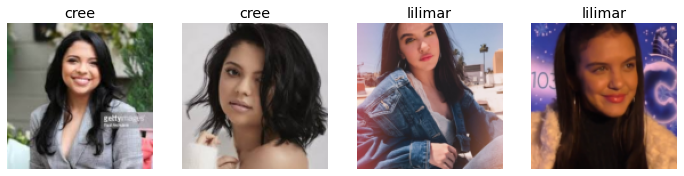

In [29]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


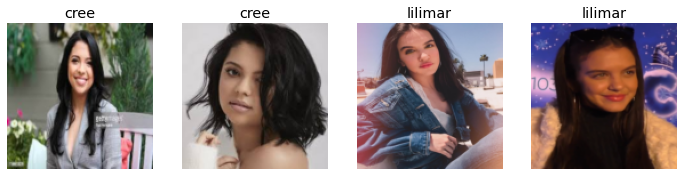

In [30]:
classes1 = classes1.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = classes1.dataloaders(PATH)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


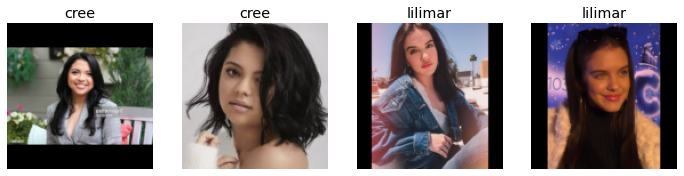

In [31]:
classes1 = classes1.new(item_tfms=Resize(128,ResizeMethod.Pad,
                                        pad_mode='zeros'))
dls = classes1.dataloaders(PATH)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


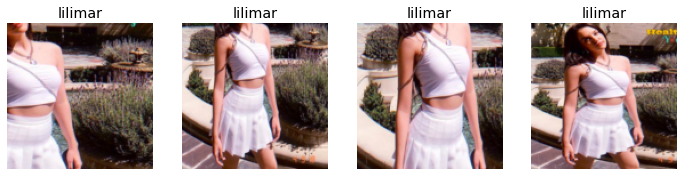

In [32]:
classes1 = classes1.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = classes1.dataloaders(PATH)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


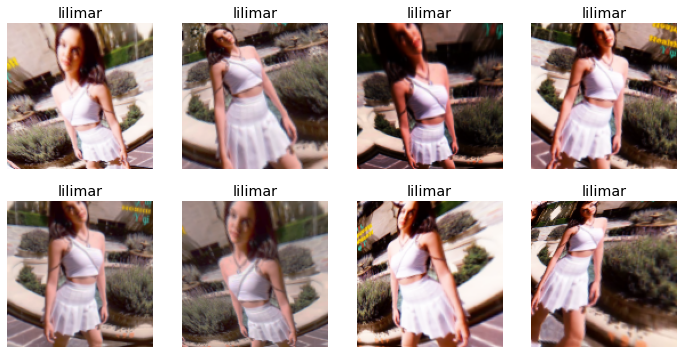

In [33]:
classes1 = classes1.new(item_tfms=Resize(128),
                       batch_tfms=aug_transforms(mult=2))
dls = classes1.dataloaders(PATH)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [34]:
classes1 = classes1.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = classes1.dataloaders(PATH)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [35]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\GlenKings/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.264998,0.994691,0.516129,02:54


epoch,train_loss,valid_loss,error_rate,time
0,1.228917,0.944709,0.532258,03:51
1,1.045002,0.833398,0.387097,04:10
2,0.958765,0.805265,0.338710,04:57
3,0.861551,0.840380,0.370968,04:41


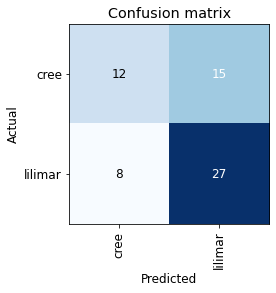

In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

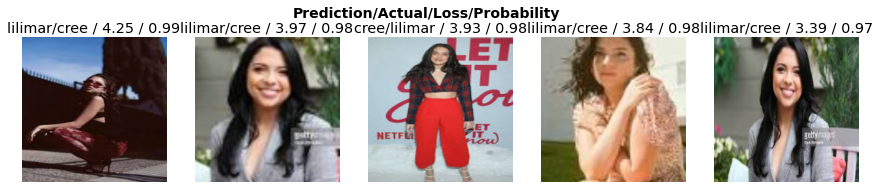

In [37]:
interp.plot_top_losses(5, nrows=1)

In [38]:
#!pip install utils
#from fastai.vision import *
#from fastai.vision.widgets import *

#from utils import *


In [39]:

#from utils import *

In [40]:
#from multiprocessing.process import _exitcode_to_name
#cleaner = ImageClassifierCleaner(learn)
#cleaner
#print(_exitcode_to_name[BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.])


In [43]:
#from fastai.vision.widgets import *
#import concurrent.futures

#if __name__ == "__main__":
    #with concurrent.futures.ProcessPoolExecutor() as executor:
       # p = executor.submit(wait.wait,1)
       # print(p.result())
        
#def parallel_trees(m, fn, n_jobs=8):
   # return list(ThreadPoolExecutor(n_jobs).map(fn, m.estimators_))
#n_cpus=1
from concurrent.futures import as_completed, ProcessPoolExecutor

with ProcessPoolExecutor(max_workers=4) as executor:
    cleaner = ImageClassifierCleaner(learn)
    cleaner

#cleaner = ImageClassifierCleaner(learn)
#cleaner

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [32]:
#if len(pickle.dumps((dClose_dt, d2Close_dt2, d3Close_dt3))) > 2 * 10 ** 9: 
       # raise RuntimeError('return data can not be sent!')

NameError: name 'dClose_dt' is not defined